**1. Loading and Preprocessing**

In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer


In [11]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
# Check for missing values
print("Missing values in each column:\n", X.isnull().sum())


Missing values in each column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [25]:
print("Duplicated rows count:\n", X.duplicated().sum())

Duplicated rows count:
 0


In [15]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [17]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (455, 30)
Test set size: (114, 30)


**2.Classification Algorithm Implementation**

*Logistic Regression*

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.9824561403508771


In [65]:
print("\n", classification_report(y_test, y_pred_lr))


               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



*Decision Tree Classifier*

In [59]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))



Decision Tree Accuracy: 0.9122807017543859


In [61]:
print("\n", classification_report(y_test, y_pred_dt))


               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



*Random Forest Classifier*

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Accuracy: 0.956140350877193


In [57]:
print("\n", classification_report(y_test, y_pred_rf))


               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



*Support Vector Machine*

In [51]:
from sklearn.svm import SVC

# Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM Accuracy: 0.9736842105263158


In [53]:
print("\n", classification_report(y_test, y_pred_svm))


               precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



*k-Nearest Neighbors*

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))



k-NN Accuracy: 0.9649122807017544


In [47]:
print("\n", classification_report(y_test, y_pred_knn))


               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**3. Model Comparison**

In [39]:
# Compare model performance
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "k-NN"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ]
})

print(results.sort_values(by="Accuracy", ascending=False))



                 Model  Accuracy
0  Logistic Regression  0.982456
3                  SVM  0.973684
4                 k-NN  0.964912
2        Random Forest  0.956140
1        Decision Tree  0.912281


In [45]:
# Identify best and worst models
best_model = results.loc[results["Accuracy"].idxmax()]
worst_model = results.loc[results["Accuracy"].idxmin()]

print("Best Model:\n", best_model)



Best Model:
 Model       Logistic Regression
Accuracy               0.982456
Name: 0, dtype: object


In [43]:
print("Worst Model:\n", worst_model)

Worst Model:
 Model       Decision Tree
Accuracy         0.912281
Name: 1, dtype: object


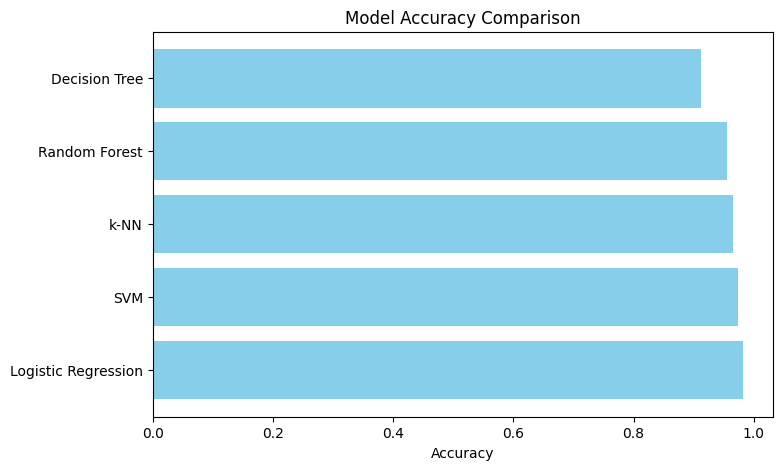

In [1]:
import matplotlib.pyplot as plt

models = ["Logistic Regression", "SVM", "k-NN", "Random Forest", "Decision Tree"]
accuracies = [0.982456, 0.973684, 0.964912, 0.956140, 0.912281]

plt.figure(figsize=(8, 5))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()
